# Import data

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('csv_files/training_data_clean')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

amount_tsh        funder  gps_height     installer  longitude   latitude              wpt_name  num_private                    basin  subvillage   region  region_code  district_code        lga        ward  population  public_meeting              recorded_by scheme_management  permit  construction_year extraction_type extraction_type_group extraction_type_class management management_group         payment payment_type water_quality quality_group      quantity quantity_group                source           source_type source_class              waterpoint_type waterpoint_type_group    status_group
0      6000.0         Roman        1390         Roman  34.938093  -9.856322                  none            0               Lake Nyasa    Mnyusi B   Iringa           11              5     Ludewa    Mundindi         109            True  GeoData Consultants Ltd               VWC   False               1999         gravity               gravity               gravity        vwc       user-group    pay annually     annually          soft          good        enough         enough                spring                spring  groundwater           communal standpipe    communal standpipe      functional
1         0.0       Grumeti        1399       GRUMETI  34.698766  -2.147466              Zahanati            0            Lake Victoria     Nyamara     Mara           20              2  Serengeti       Natta         280            True  GeoData Consultants Ltd             Other    True               2010         gravity               gravity               gravity        wug       user-group       never pay    never pay          soft          good  insufficient   insufficient  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional
2        25.0  Lottery Club         686  World vision  37.460664  -3.821329           Kwa Mahundi            0                  Pangani     Majengo  Manyara           21              4  Simanjiro     Ngorika         250            True  GeoData Consultants Ltd               VWC    True               2009         gravity               gravity               gravity        vwc       user-group  pay per bucket   per bucket          soft          good        enough         enough                   dam                   dam      surface  communal standpipe multiple    communal standpipe      functional
3         0.0        Unicef         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   Nanyumbu    Nanyumbu          58            True  GeoData Consultants Ltd               VWC    True               1986     submersible           submersible           submersible        vwc       user-group       never pay    never pay          soft          good           dry            dry           machine dbh              borehole  groundwater  communal standpipe multiple    communal standpipe  non functional
4         0.0   Action In A           0       Artisan  31.130847  -1.825359               Shuleni            0            Lake Victoria  Kyanyamisa   Kagera           18              1    Karagwe  Nyakasimbi           0            True  GeoData Consultants Ltd               VWC    True                  0         gravity               gravity               gravity      other            other       never pay    never pay          soft          good      seasonal       seasonal  rainwater harvesting  rainwater harvesting      surface           communal standpipe    communal standpipe      functional

# Create dummy varaibles

In [7]:
for col in df.columns:
    print('______________')
    print(col)
    print('unique values',len(set(df[col])), '\n')
    print(df[col].value_counts().head())
    print('______________')

______________
amount_tsh
unique values 98 

0.0       41268
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
Name: amount_tsh, dtype: int64
______________
______________
funder
unique values 1894 

Government Of Tanzania    12649
Danida                     3114
Hesawa                     2200
Rwssp                      1374
Kkkt                       1286
Name: funder, dtype: int64
______________
______________
gps_height
unique values 2428 

 0     20077
-15       60
-16       55
-13       55
-20       52
Name: gps_height, dtype: int64
______________
______________
installer
unique values 2134 

DWE           21016
Government     1825
RWE            1205
DANIDA         1050
KKKT            898
Name: installer, dtype: int64
______________
______________
longitude
unique values 57145 

0.000000     1812
37.252194       2
37.540901       2
33.010510       2
39.093484       2
Name: longitude, dtype: int64
______________
______________
latitude
unique values 57146 

-2.0000

In [1]:
# >= 8 unique values
large_catagoricals = ['funder', 'installer', 'wpt_name', 'subvillage', 
                      'region', 'region_code', 'district_code', 'lga', 'ward', 
                      'scheme_management', 'extraction_type', 
                      'extraction_type_group', 'management', 'water_quality', 
                      'source', ]
# < 8
small_catagoricals = ['basin', 'public_meeting', 'permit',
                      'extraction_type_class', 'management_group', 'payment',
                      'payment_type', 'quality_group', 'quantity', 'quantity_group', 
                      'source_type', 'source_class', 'waterpoint_type', 
                      'waterpoint_type_group',]

other = ['construction_year', 'year', 'month', 'longitude', 'latitude', 
         'num_private', 'population']

In [9]:
df.drop('recorded_by', axis=1, inplace=True)

In [10]:
def make_dummy(col):
    top_3_values = df[col].value_counts()[:3]
    other_values = df[col].value_counts()[3:]
    
    for name in top_3_values.keys():
        df.loc[df[col] == name, f'{col}: {name}'] =1
        
    for name in other_values.keys():
        df.loc[df[col] == name, f'{col}: other'] =1
    
    df.drop(col, axis=1, inplace=True)

In [11]:
for title in large_catagoricals:
    make_dummy(title)

In [12]:
df.to_csv('csv_files/training_data_dummies')

In [5]:
df = pd.read_csv('csv_files/training_data_dummies')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df2 = df

In [8]:
for name in small_catagoricals:
    dummies = pd.get_dummies(df2[name], prefix=name)
    df2 = pd.concat([df2, dummies], axis =1)
    df2.drop(name, axis=1, inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df2, palette='Paired');
plt.xlim(28, 43)
plt.show()



<Figure size 640x480 with 1 Axes>

In [10]:
df2.loc[(df2['latitude'] >= -6) & (df2['longitude'] <= 35), 'NW'] =1

df2.loc[(df2['latitude'] >= -6) & (df2['longitude'] > 35), 'NE'] =1

df2.loc[(df2['latitude'] < -6) & (df2['longitude'] <= 35), 'SW'] =1

df2.loc[(df2['latitude'] < -6) & (df2['longitude'] > 35), 'SE'] =1

df2.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [11]:
df2 = df2.fillna(0)

In [12]:
set(df2['status_group'])

{'functional', 'functional needs repair', 'non functional'}

In [13]:
df2['status_group'] = df2['status_group'].replace(['functional needs repair'], 2)

In [14]:
df2['status_group'] = df2['status_group'].replace(['functional', ], 1)

In [15]:
df2['status_group'] = df2['status_group'].replace(['non functional'], 0)

In [16]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59029 entries, 0 to 59028
Data columns (total 146 columns):
amount_tsh                                     float64
gps_height                                     int64
num_private                                    int64
population                                     int64
construction_year                              int64
status_group                                   int64
funder: Government Of Tanzania                 float64
funder: Danida                                 float64
funder: Hesawa                                 float64
funder: other                                  float64
installer: DWE                                 float64
installer: Government                          float64
installer: RWE                                 float64
installer: other                               float64
wpt_name: none                                 float64
wpt_name: Shuleni                              float64
wpt_name: Zahanati  

# Train Test Split

In [17]:
X = df2.drop(['status_group'], axis = 1)
y = df2['status_group']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Scaled data

In [19]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()


X_train_minmax = mmscaler.fit_transform(X_train)
X_test_minmax = mmscaler.transform(X_test)

# Logistic Regression

## Base Model

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, multi_class = 'multinomial', solver='lbfgs')
model_log = logreg.fit(X_train_minmax, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False,
                   multi_class='multinomial')

In [22]:
y_hat_test = model_log.predict(X_test_minmax)
y_hat_train = model_log.predict(X_train_minmax)

In [23]:
from sklearn.metrics import roc_auc_score

y_score = model_log.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)

auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')

In [24]:
from sklearn.metrics import classification_report


target_names = ['non functional', 'functional', 'functional needs repair']

print('Test data')
print(classification_report(y_test, y_hat_test, target_names= target_names))
print(f'AUC: {auc}')


Test data
                         precision    recall  f1-score   support

         non functional       0.77      0.60      0.68      5664
             functional       0.70      0.90      0.79      8006
functional needs repair       0.45      0.07      0.12      1088

               accuracy                           0.72     14758
              macro avg       0.64      0.52      0.53     14758
           weighted avg       0.71      0.72      0.70     14758

AUC: 0.7888792974951123


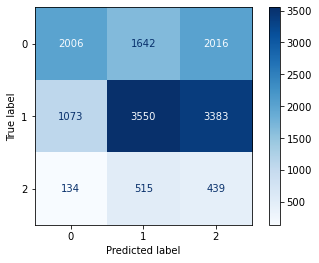

In [25]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)

## Weighted

In [26]:
y_train.value_counts()

1    24048
0    16995
2     3228
Name: status_group, dtype: int64

In [27]:
weights = [None, 'balanced', {1:2, 0:1, 1:10}, {1:10, 0:1, 1:100}, {1:100, 0:1, 1:1000}, {1:1000, 0:1, 1:10000}]
names = ['None', 'Balanced', '2 to 1 to 10', '10 to 1 to 100', '100 to 1 to 1000', '1000 to 1 to 10000']


for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, 
                                multi_class= 'multinomial', solver='lbfgs')
    model_log = logreg.fit(X_train_minmax, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test_minmax)

    y_score = logreg.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)

    auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
    
    print(f'AUC for {names[n]}: {auc}')
    print('-------------------------------------------------------------------------------------')

LogisticRegression(C=1e+20, fit_intercept=False, multi_class='multinomial')
AUC for None: 0.7888795889362745
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False,
                   multi_class='multinomial')
AUC for Balanced: 0.7966830736982177
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 10}, fit_intercept=False,
                   multi_class='multinomial')
AUC for 2 to 1 to 10: 0.7715455301335149
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 100}, fit_intercept=False,
                   multi_class='multinomial')
AUC for 10 to 1 to 100: 0.7579327874919971
-------------------------------------------------------------------------------------
LogisticRegression(C=1e+20, class_weight={0: 1, 1: 1000}, f

In [28]:
logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight='balanced', 
                            multi_class= 'multinomial', solver='lbfgs')
model_log = logreg.fit(X_train_minmax, y_train)
print(model_log)

# Predict
y_hat_test = model_log.predict(X_test_minmax)

print(classification_report(y_test, y_hat_test, target_names= target_names))

# Check the AUC for predictions
y_score = model_log.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False,
                   multi_class='multinomial')
                         precision    recall  f1-score   support

         non functional       0.76      0.59      0.66      5664
             functional       0.76      0.62      0.68      8006
functional needs repair       0.18      0.64      0.28      1088

               accuracy                           0.61     14758
              macro avg       0.57      0.62      0.54     14758
           weighted avg       0.72      0.61      0.64     14758


AUC is :0.7460029840228183


## Smote

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_minmax, y_train) 

In [31]:
print(pd.Series(y_train_resampled).value_counts()) 

2    24048
1    24048
0    24048
Name: status_group, dtype: int64


In [32]:
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2, 1e13]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2, 1e13]

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, multi_class = 'multinomial', solver='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = model_log.predict(X_test_minmax)

    y_score = model_log.fit(X_train_resampled, y_train_resampled).predict_proba(X_test_minmax)

    auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
    
    print(f'AUC for {names[n]}: {auc}')
    print('-------------------------------------------------------')

LogisticRegression(C=0.005, fit_intercept=False, multi_class='multinomial')
AUC for 0.005: 0.7957514813140808
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, multi_class='multinomial')
AUC for 0.1: 0.7966065743861531
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, multi_class='multinomial')
AUC for 0.2: 0.7964462019614548
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, multi_class='multinomial')
AUC for 0.5: 0.7962606349631237
-------------------------------------------------------
LogisticRegression(C=0.8, fit_intercept=False, multi_class='multinomial')
AUC for 0.8: 0.796270352494927
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, multi_class='multinomial')
AUC for 1: 0.7963066054823956
-------------------------------------------------------
LogisticRegression(C=1.25, fi

In [33]:
    logreg = LogisticRegression(fit_intercept=False, C=1e13, multi_class = 'multinomial', solver='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    
    y_hat_test = model_log.predict(X_test_minmax)

In [34]:
print('Test data')
print(classification_report(y_test, y_hat_test, target_names= target_names))
print(f'AUC: {auc}')

Test data
                         precision    recall  f1-score   support

         non functional       0.75      0.59      0.66      5664
             functional       0.76      0.61      0.68      8006
functional needs repair       0.18      0.64      0.28      1088

               accuracy                           0.61     14758
              macro avg       0.56      0.61      0.54     14758
           weighted avg       0.71      0.61      0.64     14758

AUC: 0.7963538543605982


# Decision Tree

## Initial model

In [70]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(criterion='entropy')

model_clf = clf.fit(X_train_minmax, y_train)

y_pred = model_clf.predict(X_test_minmax)  

In [71]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Look at the classification report
print('\n',classification_report(y_test, y_pred, target_names= target_names))

# Check the AUC for predictions
y_score = model_clf.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')



                          precision    recall  f1-score   support

         non functional       0.75      0.74      0.75      5664
             functional       0.78      0.80      0.79      8006
functional needs repair       0.36      0.30      0.33      1088

               accuracy                           0.74     14758
              macro avg       0.63      0.62      0.62     14758
           weighted avg       0.74      0.74      0.74     14758


AUC is :0.7431024901798393


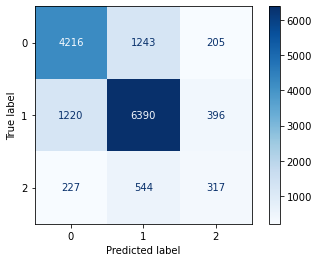

In [73]:
plot_confusion_matrix(model_clf, X_test_minmax, y_test,
                     cmap=plt.cm.Blues);

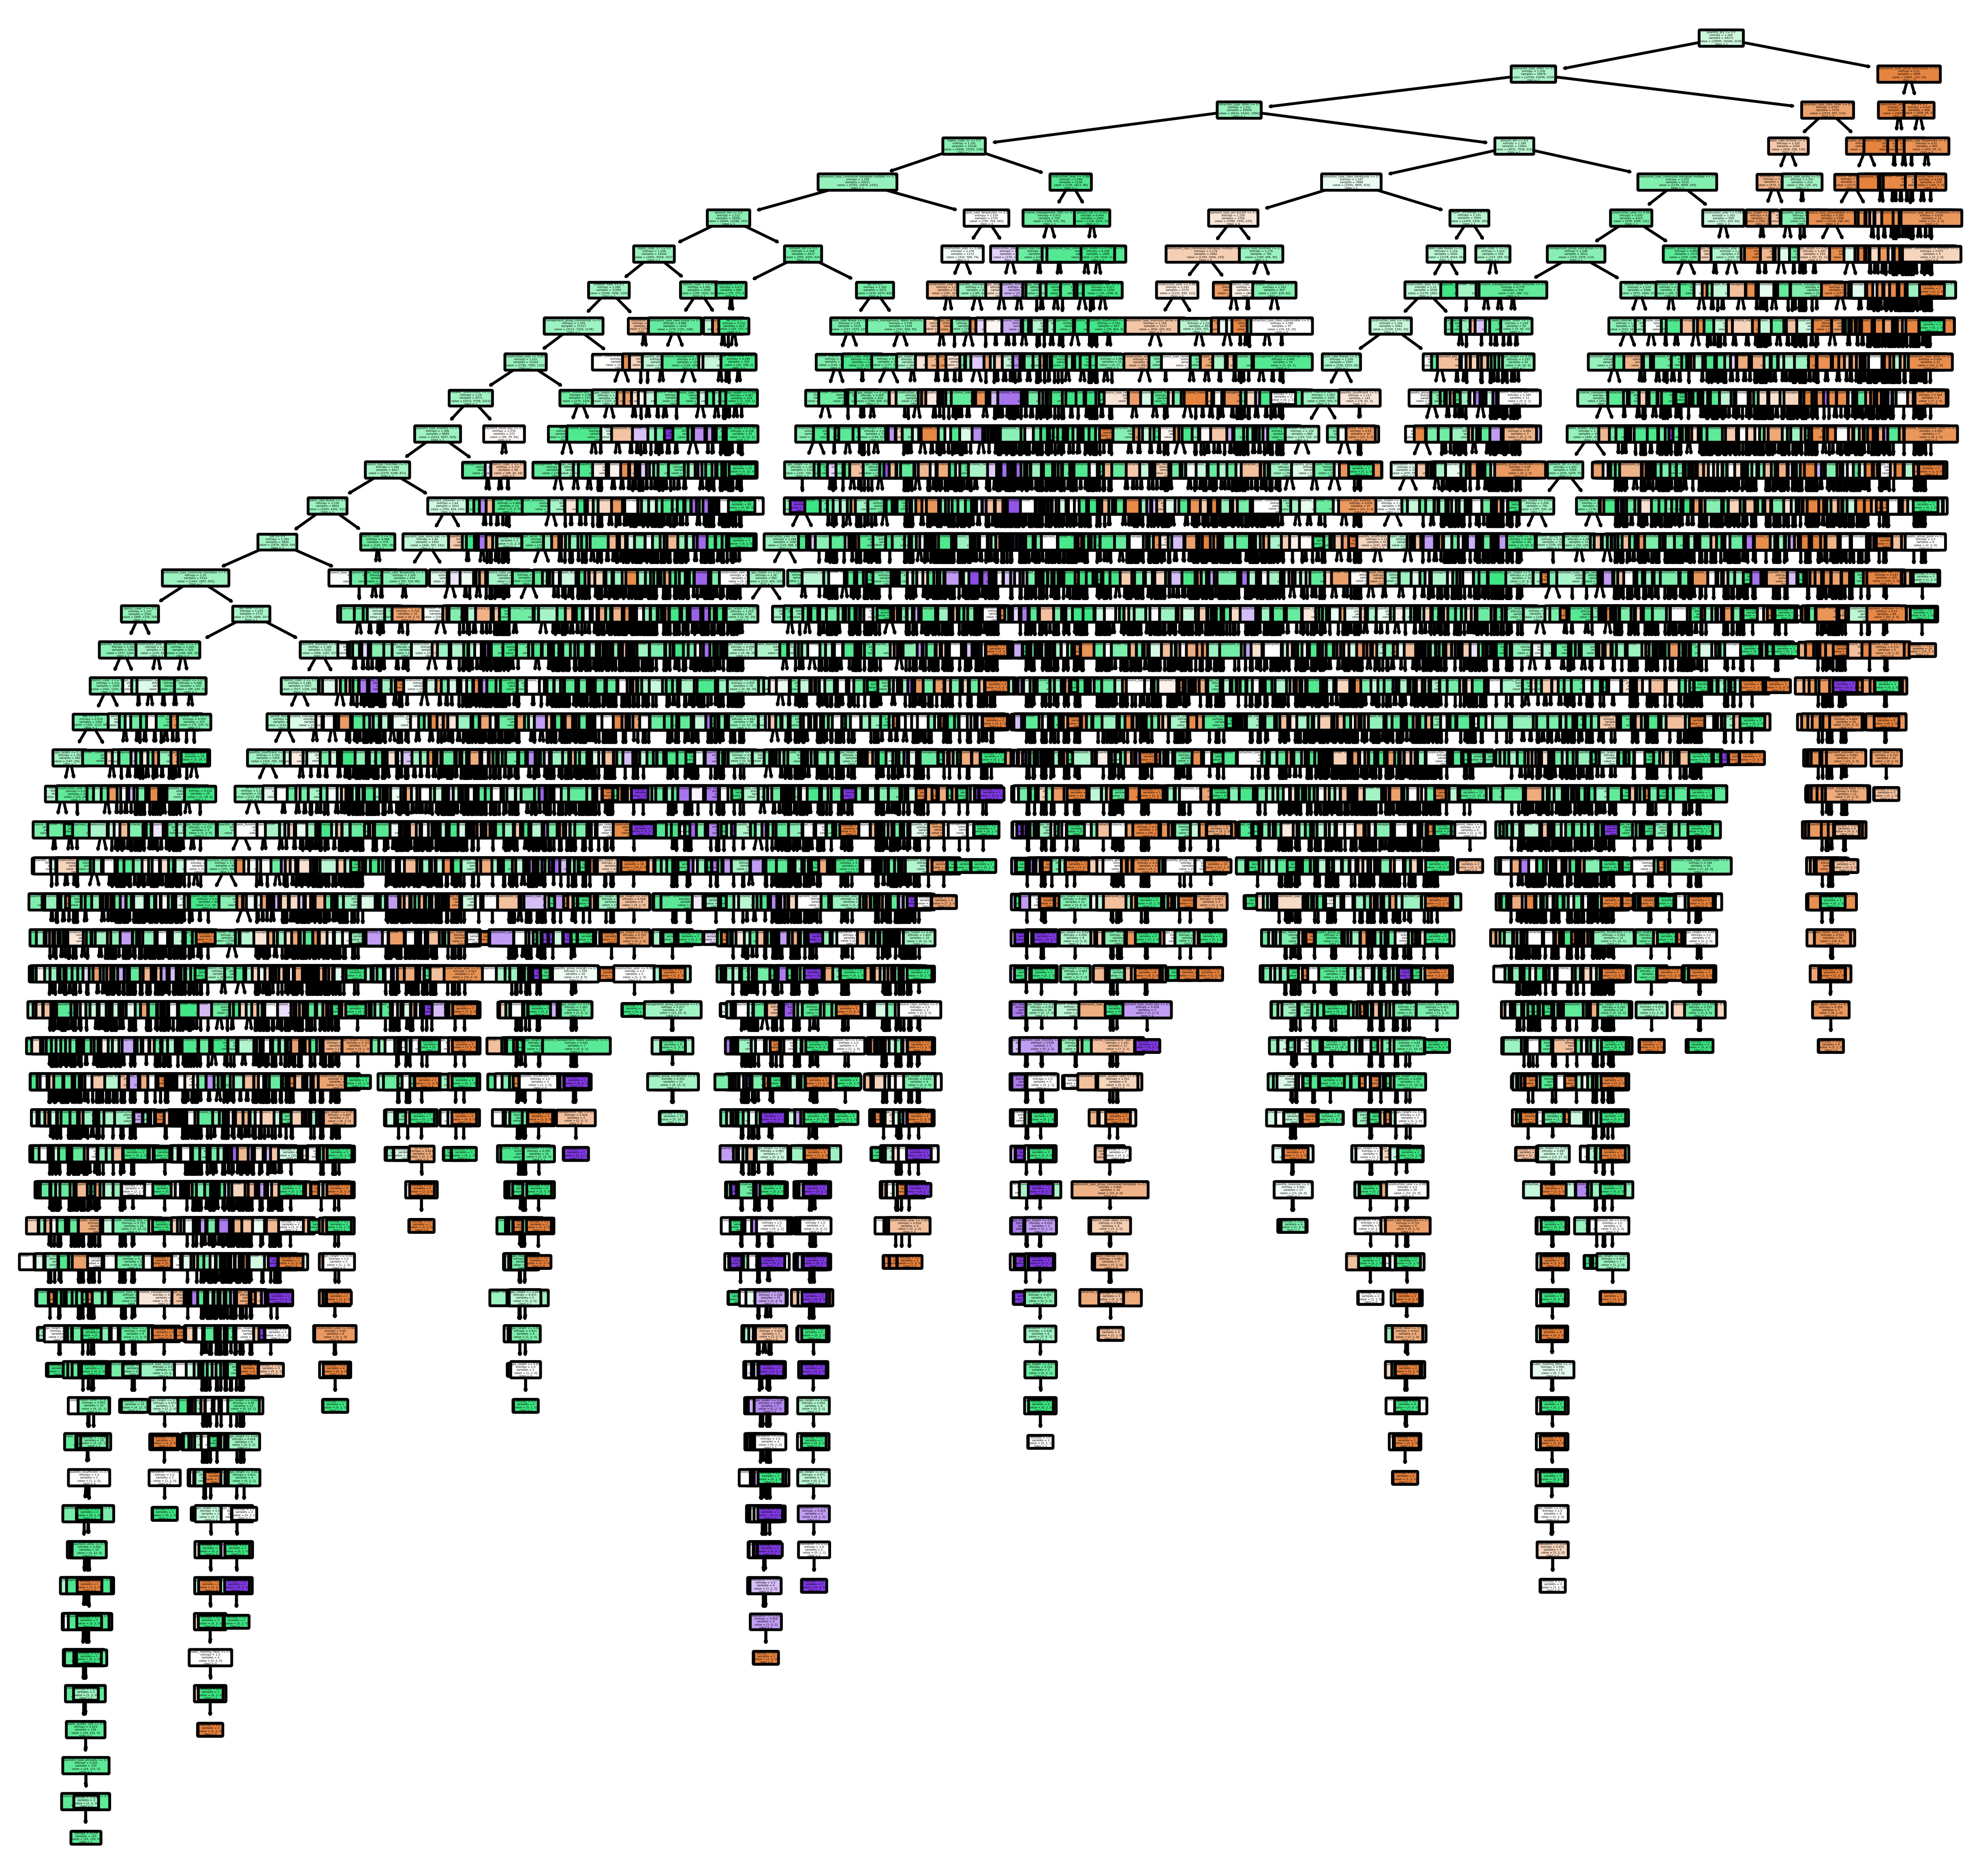

In [78]:
from sklearn import tree

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

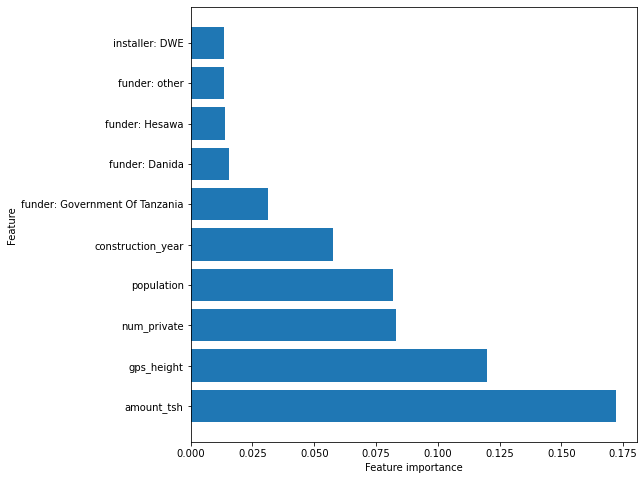

In [43]:

def plot_feature_importances(model):
    n_features = 10
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), np.sort(clf.feature_importances_)[:-11:-1], align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)



## Random Forests

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
model_forest = forest.fit(X_train_minmax, y_train)

In [45]:
y_pred = model_forest.predict(X_test_minmax)
print(classification_report(y_test, y_pred, target_names= target_names))

# Check the AUC for predictions
y_score = model_forest.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

                         precision    recall  f1-score   support

         non functional       0.87      0.59      0.71      5664
             functional       0.70      0.95      0.81      8006
functional needs repair       0.55      0.06      0.10      1088

               accuracy                           0.75     14758
              macro avg       0.71      0.53      0.54     14758
           weighted avg       0.76      0.75      0.72     14758


AUC is :0.7468304703517535


##  Grid search

In [46]:
from sklearn.model_selection import  GridSearchCV

In [47]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features' : [20, 30, 40, 50],
    'max_depth': [16,17,18,19],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1, 2, 3]
}

In [56]:
# Instantiate GridSearchCV
dt_clf = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_minmax, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 17, 18, 19],
                         'max_features': [20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6]},
             return_train_score=True)

In [57]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'max_features': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [59]:
forest = RandomForestClassifier(criterion='entropy',
                           max_features= 30,
                           max_depth=19,
                           min_samples_split=3,
                           min_samples_leaf=3, 
                           random_state=123)
model_forest = forest.fit(X_train_minmax, y_train)

y_pred = model_forest.predict(X_test_minmax)
print(classification_report(y_test, y_pred, target_names= target_names))

#Check the AUC for predictions
y_score = model_forest.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

                         precision    recall  f1-score   support

         non functional       0.85      0.72      0.78      5664
             functional       0.77      0.92      0.84      8006
functional needs repair       0.59      0.23      0.33      1088

               accuracy                           0.79     14758
              macro avg       0.74      0.62      0.65     14758
           weighted avg       0.79      0.79      0.78     14758


AUC is :0.7468304703517535


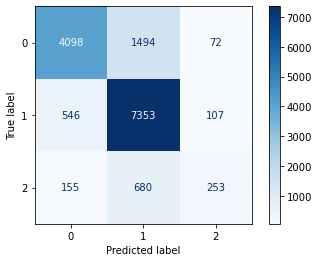

In [60]:
plot_confusion_matrix(model_forest, X_test_minmax, y_test,
                     cmap=plt.cm.Blues)

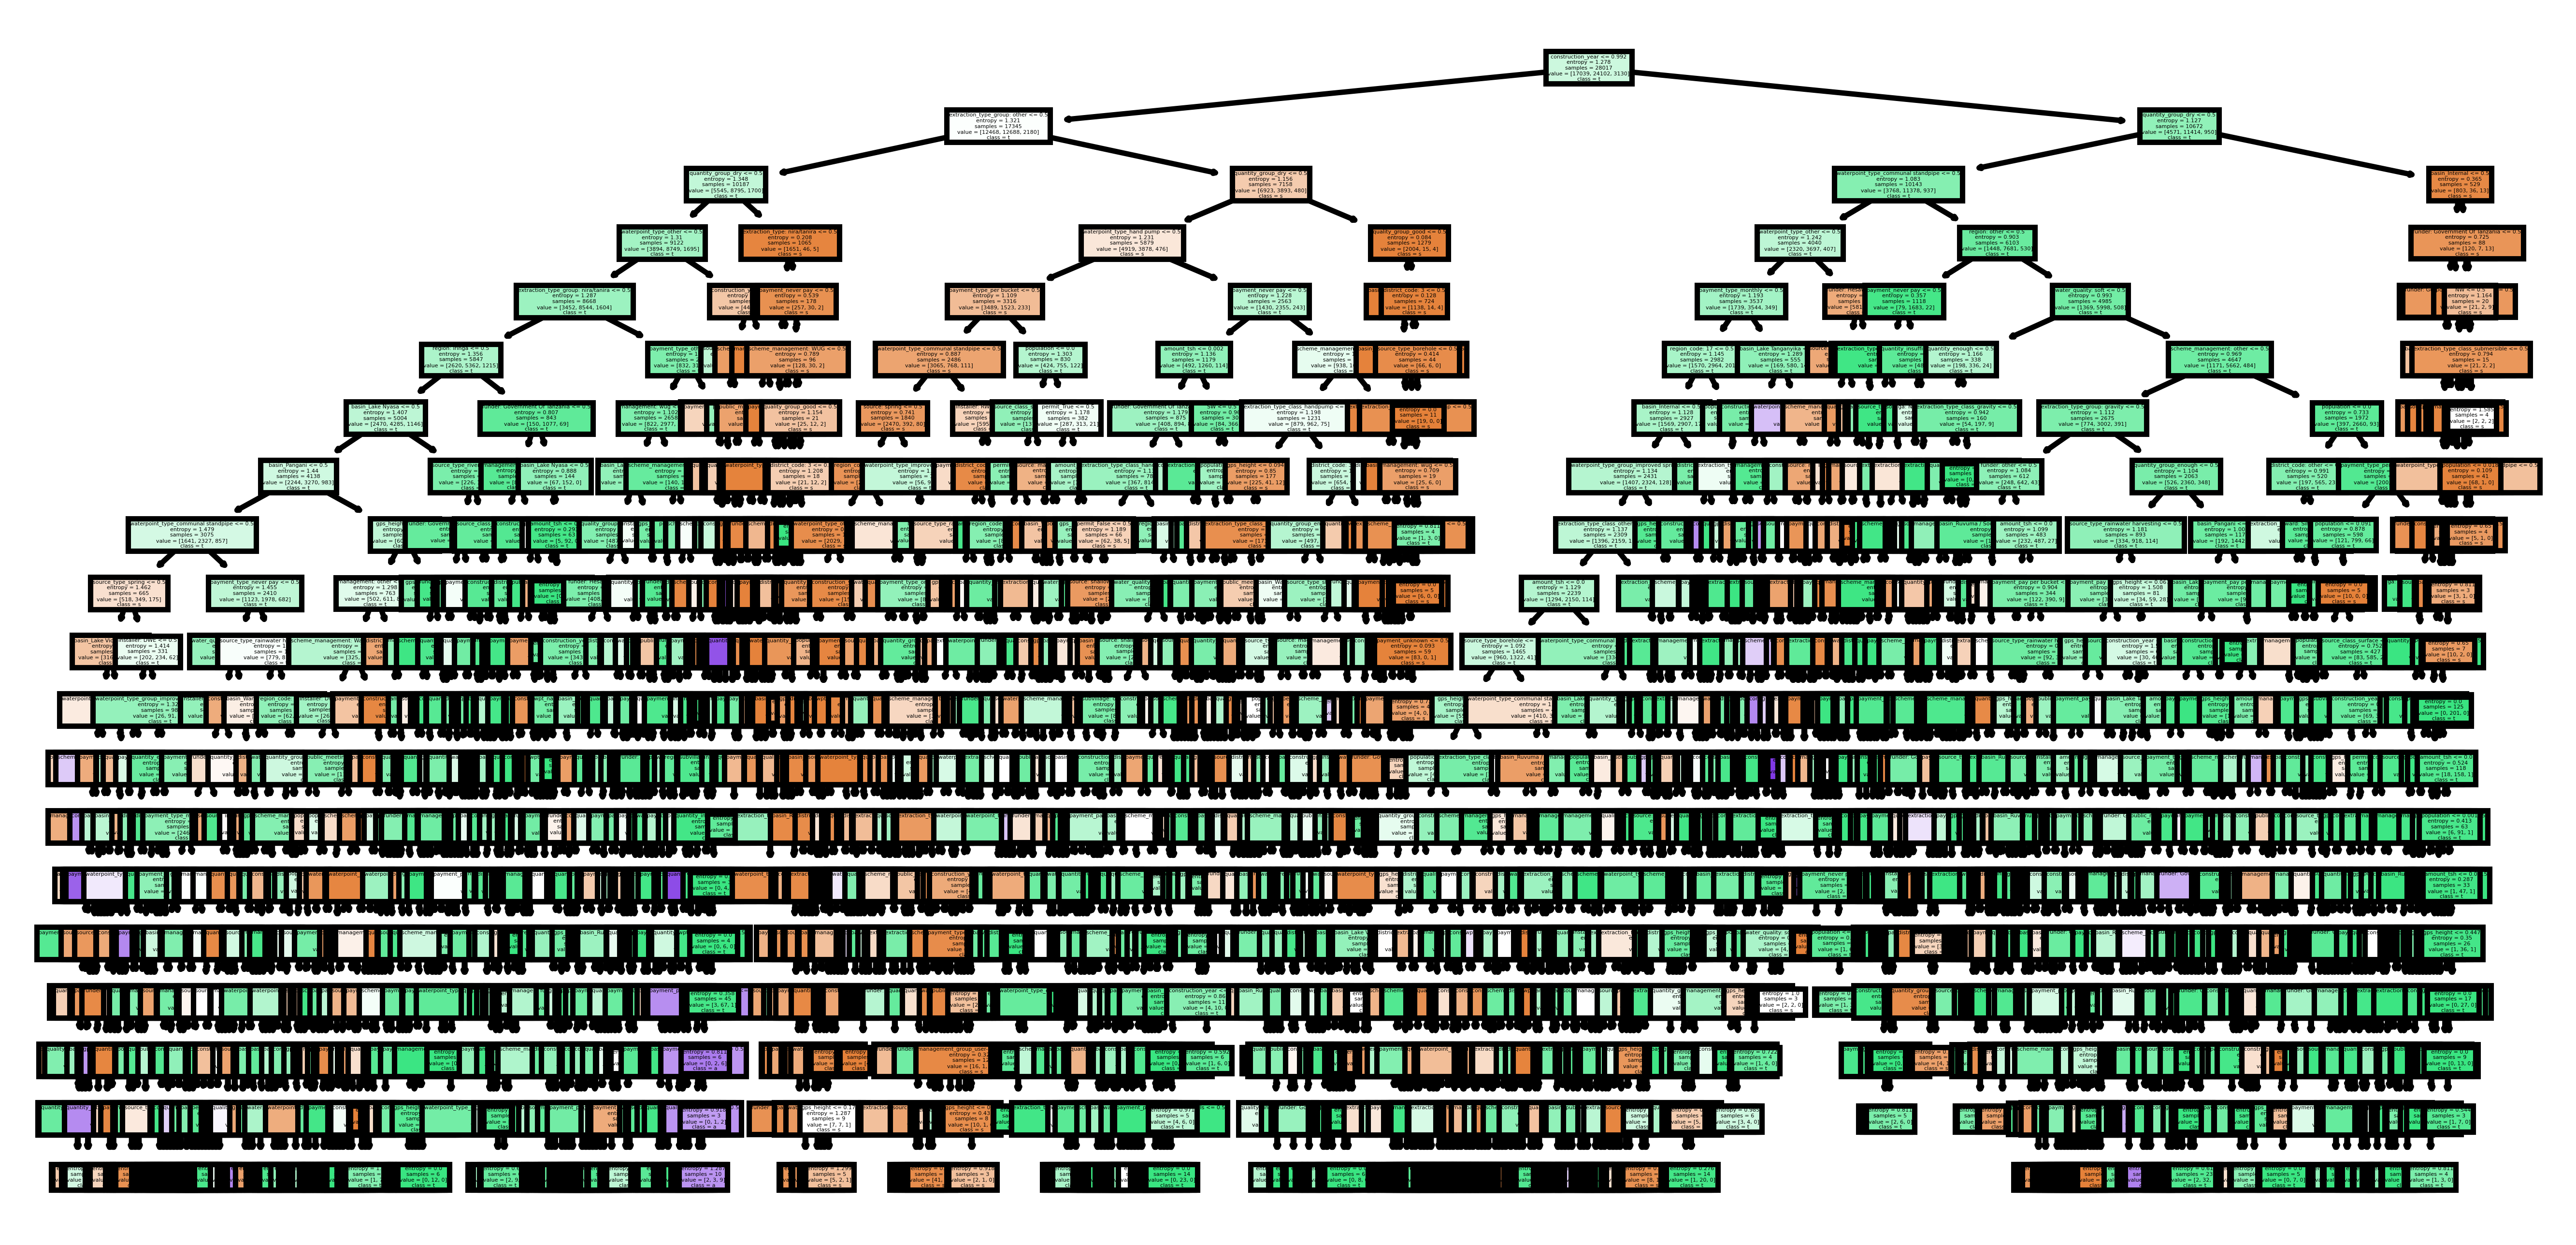

In [79]:
fn = X_train.columns
cn = 'status_group'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=800)
tree.plot_tree(model_forest.estimators_[3],
               feature_names = fn, 
               class_names=cn,
               filled = True);

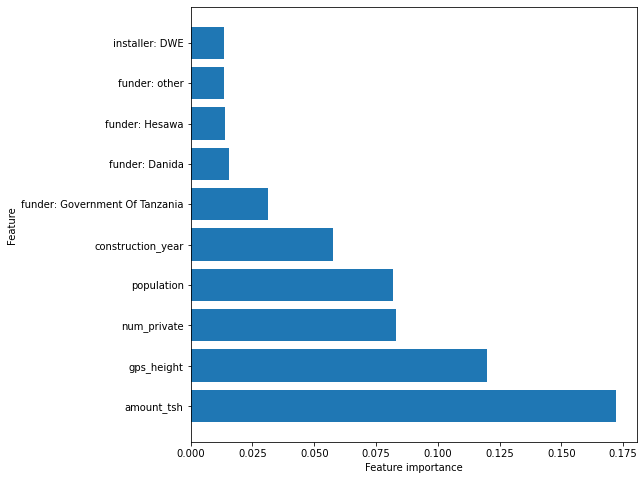

In [61]:
plot_feature_importances(model_forest)

In [63]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features= 30,
                           max_depth=19,
                           min_samples_split=3,
                           min_samples_leaf=3, 
                           random_state=123)
model_dt = dt.fit(X_train_minmax, y_train)

y_pred = model_dt.predict(X_test_minmax)
print(classification_report(y_test, y_pred, target_names= target_names))

# Check the AUC for predictions
y_score = model_dt.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

                         precision    recall  f1-score   support

         non functional       0.77      0.72      0.74      5664
             functional       0.76      0.85      0.80      8006
functional needs repair       0.45      0.23      0.30      1088

               accuracy                           0.75     14758
              macro avg       0.66      0.60      0.62     14758
           weighted avg       0.74      0.75      0.74     14758


AUC is :0.7468304703517535


# XGBoost

In [64]:
import xgboost as xgb

In [65]:
clf = xgb.XGBClassifier()
model_clf = clf.fit(X_train_minmax, y_train)

y_pred =model_clf.predict(X_test_minmax)
print(classification_report(y_test, y_pred, target_names= target_names))

# Check the AUC for predictions
y_score = model_clf.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

                         precision    recall  f1-score   support

         non functional       0.82      0.60      0.69      5664
             functional       0.71      0.92      0.80      8006
functional needs repair       0.58      0.07      0.12      1088

               accuracy                           0.74     14758
              macro avg       0.70      0.53      0.54     14758
           weighted avg       0.74      0.74      0.71     14758


AUC is :0.7468304703517535


# K-Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier
model_knn = knn.fit(X_train_minmax, y_train)

# Predict on the test set
y_pred = model_knn.predict(X_test_minmax)

In [67]:
print(classification_report(y_test, y_pred, target_names= target_names))

# Check the AUC for predictions
y_score = model_knn.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
roc_auc = roc_auc_score(y_test, y_score, multi_class = 'ovo')
print(f'\nAUC is :{auc}')

                         precision    recall  f1-score   support

         non functional       0.77      0.75      0.76      5664
             functional       0.78      0.85      0.82      8006
functional needs repair       0.49      0.24      0.32      1088

               accuracy                           0.77     14758
              macro avg       0.68      0.61      0.63     14758
           weighted avg       0.76      0.77      0.76     14758


AUC is :0.7468304703517535


In [68]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average = 'micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [80]:
from sklearn.metrics import f1_score
find_best_k(X_train_minmax, y_train, X_test_minmax, y_test)

Best Value for k: 5
F1-Score: 0.7673126439897004
